# Top skills-Dashboard

A global IT and business consulting services firm wants to keep pace with changing technologies and remain competitive in the IT field. The company regularly  analyze data to help identify top present and future skill requirements.

The objective of the project is to analyze and identify insights for the emerging skills.Then from the insights obtained, create dashboard using IBM Cognos Analytics that will display top trends for skill requirements in the IT field.

## Project planning

**Purpose** :
To unlock insights and trends from the data to identify top in demand and future skill requirements and help the company to remain in pace with changing technology.

**Results** : 
To create a IBM Cognos Analytics dashboard that displays quick and better insights regarding top emerging skill requirements.

**Outline** :
* Data Wrangling
* Exploratory Data Analysis
* Creating Dashboard using IBM Cognos Analytics

**Success criteria** : 

The dashboard was able to display,
* Top programming languages in demand.
* Top databases in demand.
* Top web frames in demand .
          

**About the data**

The dataset is taken from Stack Overflow .Stack Overflow, a popular website for developers, conducted an online survey of software professionals across the world. It is the largest and most comprehensive survey of people who code around the world. 
The survey data was later open sourced by Stack Overflow. The data set has around 90,000 responses.
I am going to analyze a subset of data in this project.This randomised subset contains around 1/10th of the original data set.

## 1. Data Wrangling

### 1. Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter,defaultdict

### 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [170]:
df = pd.read_csv('technology.csv')
df.head(3)

,Respondent,MainBranch,Country,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,OpSys
0,4,I am a developer by profession,United States,"Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,Windows
1,9,I am a developer by profession,New Zealand,"Database administrator;Developer, back-end;Dev...",Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,MacOS
2,13,I am a developer by profession,United States,Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Express;Vue.js,Windows


In [139]:
df.tail(5)

,Respondent,MainBranch,Country,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,OpSys
11547,25136,I am a developer by profession,United States,Data or business analyst;Database administrato...,C#;F#;HTML/CSS;Java;JavaScript;SQL,C#;F#;JavaScript;SQL;TypeScript;WebAssembly,Microsoft SQL Server,Microsoft SQL Server,Kubernetes;Raspberry Pi;Windows,AWS;Windows,ASP.NET;jQuery,Vue.js,Windows
11548,25137,I am a developer by profession,Poland,"Developer, back-end",HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;SQL,MySQL,MariaDB;MongoDB;MySQL,AWS,Android;Arduino;AWS,NaN,jQuery,Windows
11549,25138,I am a developer by profession,United States,"Designer;Developer, back-end;Developer, deskto...",Assembly;Bash/Shell/PowerShell;C;C++;C#;Java;J...,C#;Java,PostgreSQL,NaN,Linux;Raspberry Pi;Windows,Android;Windows,NaN,NaN,Linux-based
11550,25141,I am a developer by profession,Switzerland,"Database administrator;Developer, back-end;Dev...",Bash/Shell/PowerShell;C++;C#;HTML/CSS;Java;Jav...,C++;C#;F#,Microsoft SQL Server;Redis,Elasticsearch;MongoDB;Microsoft SQL Server;Redis,Android;iOS;Windows,Android;Arduino;Docker;iOS;Kubernetes;Windows,Angular/Angular.js;ASP.NET;jQuery;Vue.js,Angular/Angular.js;ASP.NET;Vue.js,Windows
11551,25142,I am a developer by profession,United Kingdom,Academic researcher,Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;PHP;Py...,Bash/Shell/PowerShell;C;C++;Python;R,PostgreSQL,PostgreSQL,Linux;Raspberry Pi,Docker;Linux;Raspberry Pi,NaN,NaN,MacOS


In [140]:
df.columns

Index(['Respondent', 'MainBranch', 'Country', 'DevType', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'OpSys'],
      dtype='object')

In [141]:
df.size

150176

In [142]:
df.shape

(11552, 13)

### 3. Checking the types of data

In [171]:
df.dtypes

Respondent                 int64
MainBranch                object
Country                   object
DevType                   object
LanguageWorkedWith        object
LanguageDesireNextYear    object
DatabaseWorkedWith        object
DatabaseDesireNextYear    object
PlatformWorkedWith        object
PlatformDesireNextYear    object
WebFrameWorkedWith        object
WebFrameDesireNextYear    object
OpSys                     object
dtype: object

### 4.Droping irrelevent columns from the Dataframe

In [172]:
df.drop(['MainBranch','DevType'], axis = 1, inplace = True)

### 5. Renaming the columns

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [173]:
df.columns = ['ID','Country','Languages_Worked','Languages_Desired','Databases_Worked','Databases_Desired','Platforms_Worked','Platforms_Desired','WebFrames_Worked','WebFrames_Desired','Operating_Sys']

### 6. Dropping the duplicate rows


This is often a handy thing to do because a huge data set as in this case contains more than 9,683 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. 

In [143]:
df.shape

(11552, 13)

In [144]:
df.count()

Respondent                11552
MainBranch                11552
Country                   11552
DevType                   11485
LanguageWorkedWith        11541
LanguageDesireNextYear    11415
DatabaseWorkedWith        11096
DatabaseDesireNextYear    10497
PlatformWorkedWith        11130
PlatformDesireNextYear    10991
WebFrameWorkedWith        10139
WebFrameDesireNextYear     9918
OpSys                     11518
dtype: int64

In [146]:
duplicate_df = df[df.duplicated(subset = None,keep = 'first')]
print("number of duplicate rows: ", len(duplicate_df))

number of duplicate rows:  154


In [147]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [148]:
duplicate_df = df[df.duplicated(subset = None,keep = 'first')]
print("number of duplicate rows: ", len(duplicate_df))

number of duplicate rows:  0


### 7. Dropping the missing or null values.


This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because most of the time we just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values.

In [149]:
df.isnull().sum()

Respondent                   0
MainBranch                   0
Country                      0
DevType                     65
LanguageWorkedWith          11
LanguageDesireNextYear     134
DatabaseWorkedWith         453
DatabaseDesireNextYear    1042
PlatformWorkedWith         411
PlatformDesireNextYear     544
WebFrameWorkedWith        1393
WebFrameDesireNextYear    1617
OpSys                       34
dtype: int64

In [150]:
df.dropna(inplace = True)

In [151]:
df.isnull().sum()

Respondent                0
MainBranch                0
Country                   0
DevType                   0
LanguageWorkedWith        0
LanguageDesireNextYear    0
DatabaseWorkedWith        0
DatabaseDesireNextYear    0
PlatformWorkedWith        0
PlatformDesireNextYear    0
WebFrameWorkedWith        0
WebFrameDesireNextYear    0
OpSys                     0
dtype: int64

### 8. Denormalizing Dataframe

As we can see the columns consists more number of data values. Hence we will separate the values using split function and create new data frames.

In [155]:
def create_df(data):
    tech_dict = Counter()
    for line in df[data]:
        technology = line.split(';')
        for item in technology:
            tech_dict[item] += 1
    return tech_dict

In [160]:
df_Languages_Worked = pd.DataFrame.from_dict(create_df('Languages_Worked'), orient='index').reset_index()
df_Languages_Worked = df_Languages_Worked.rename(columns={'index':'Languages', 0:'Count'})
df_Languages_Worked.sort_values('Count',ascending = True,inplace = True)

df_Languages_Desired = pd.DataFrame.from_dict(create_df('Languages_Desired'), orient='index').reset_index()
df_Languages_Desired = df_Languages_Desired.rename(columns={'index':'Languages', 0:'Count'})
df_Languages_Desired.sort_values('Count',ascending = True,inplace = True)


df_Databases_Worked = pd.DataFrame.from_dict(create_df('Databases_Worked'), orient='index').reset_index()
df_Databases_Worked = df_Databases_Worked.rename(columns={'index':'Databases', 0:'Count'})
df_Databases_Worked.sort_values('Count',ascending = True,inplace = True)

df_Databases_Desired = pd.DataFrame.from_dict(create_df('Databases_Desired'), orient='index').reset_index()
df_Databases_Desired = df_Databases_Desired.rename(columns={'index':'Databases', 0:'Count'})
df_Databases_Desired.sort_values('Count',ascending = True,inplace = True)


df_Platforms_Worked = pd.DataFrame.from_dict(create_df('Platforms_Worked'), orient='index').reset_index()
df_Platforms_Worked = df_Platforms_Worked.rename(columns={'index':'Platforms', 0:'Count'})
df_Platforms_Worked.sort_values('Count',ascending = True,inplace = True)

df_Platforms_Desired = pd.DataFrame.from_dict(create_df('Platforms_Desired'), orient='index').reset_index()
df_Platforms_Desired = df_Platforms_Desired.rename(columns={'index':'Platforms', 0:'Count'})
df_Platforms_Desired.sort_values('Count',ascending = True,inplace = True)


df_WebFrames_Worked = pd.DataFrame.from_dict(create_df('WebFrames_Worked'), orient='index').reset_index()
df_WebFrames_Worked = df_WebFrames_Worked.rename(columns={'index':'WebFrames', 0:'Count'})
df_WebFrames_Worked.sort_values('Count',ascending = True,inplace = True)

df_WebFrames_Desired = pd.DataFrame.from_dict(create_df('WebFrames_Desired'), orient='index').reset_index()
df_WebFrames_Desired = df_WebFrames_Desired.rename(columns={'index':'WebFrames', 0:'Count'})
df_WebFrames_Desired.sort_values('Count',ascending = True,inplace = True)

df_Operating_Sys = pd.DataFrame.from_dict(create_df('Operating_Sys'), orient='index').reset_index()
df_Operating_Sys = df_Operating_Sys.rename(columns={'index':'Operating_Sys', 0:'Count'})
df_Operating_Sys.sort_values('Count',ascending = True,inplace = True)

## Exploratory Data Analysis

### 1. Summarizing categorical data.

In [174]:
df.describe(include = 'object')

,Country,Languages_Worked,Languages_Desired,Databases_Worked,Databases_Desired,Platforms_Worked,Platforms_Desired,WebFrames_Worked,WebFrames_Desired,Operating_Sys
count,11552,11541,11415,11096,10497,11130,10991,10139,9918,11518
unique,135,4534,6052,1560,1678,2876,3390,1002,1017,4
top,United States,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,Windows,Windows,ASP.NET;jQuery,React.js,Windows
freq,3173,276,116,857,548,900,336,528,593,5253


### 2. Analysing data using visualization.

#### 1. Visualizing Top Languaes worked with and desired to work with using bar graph

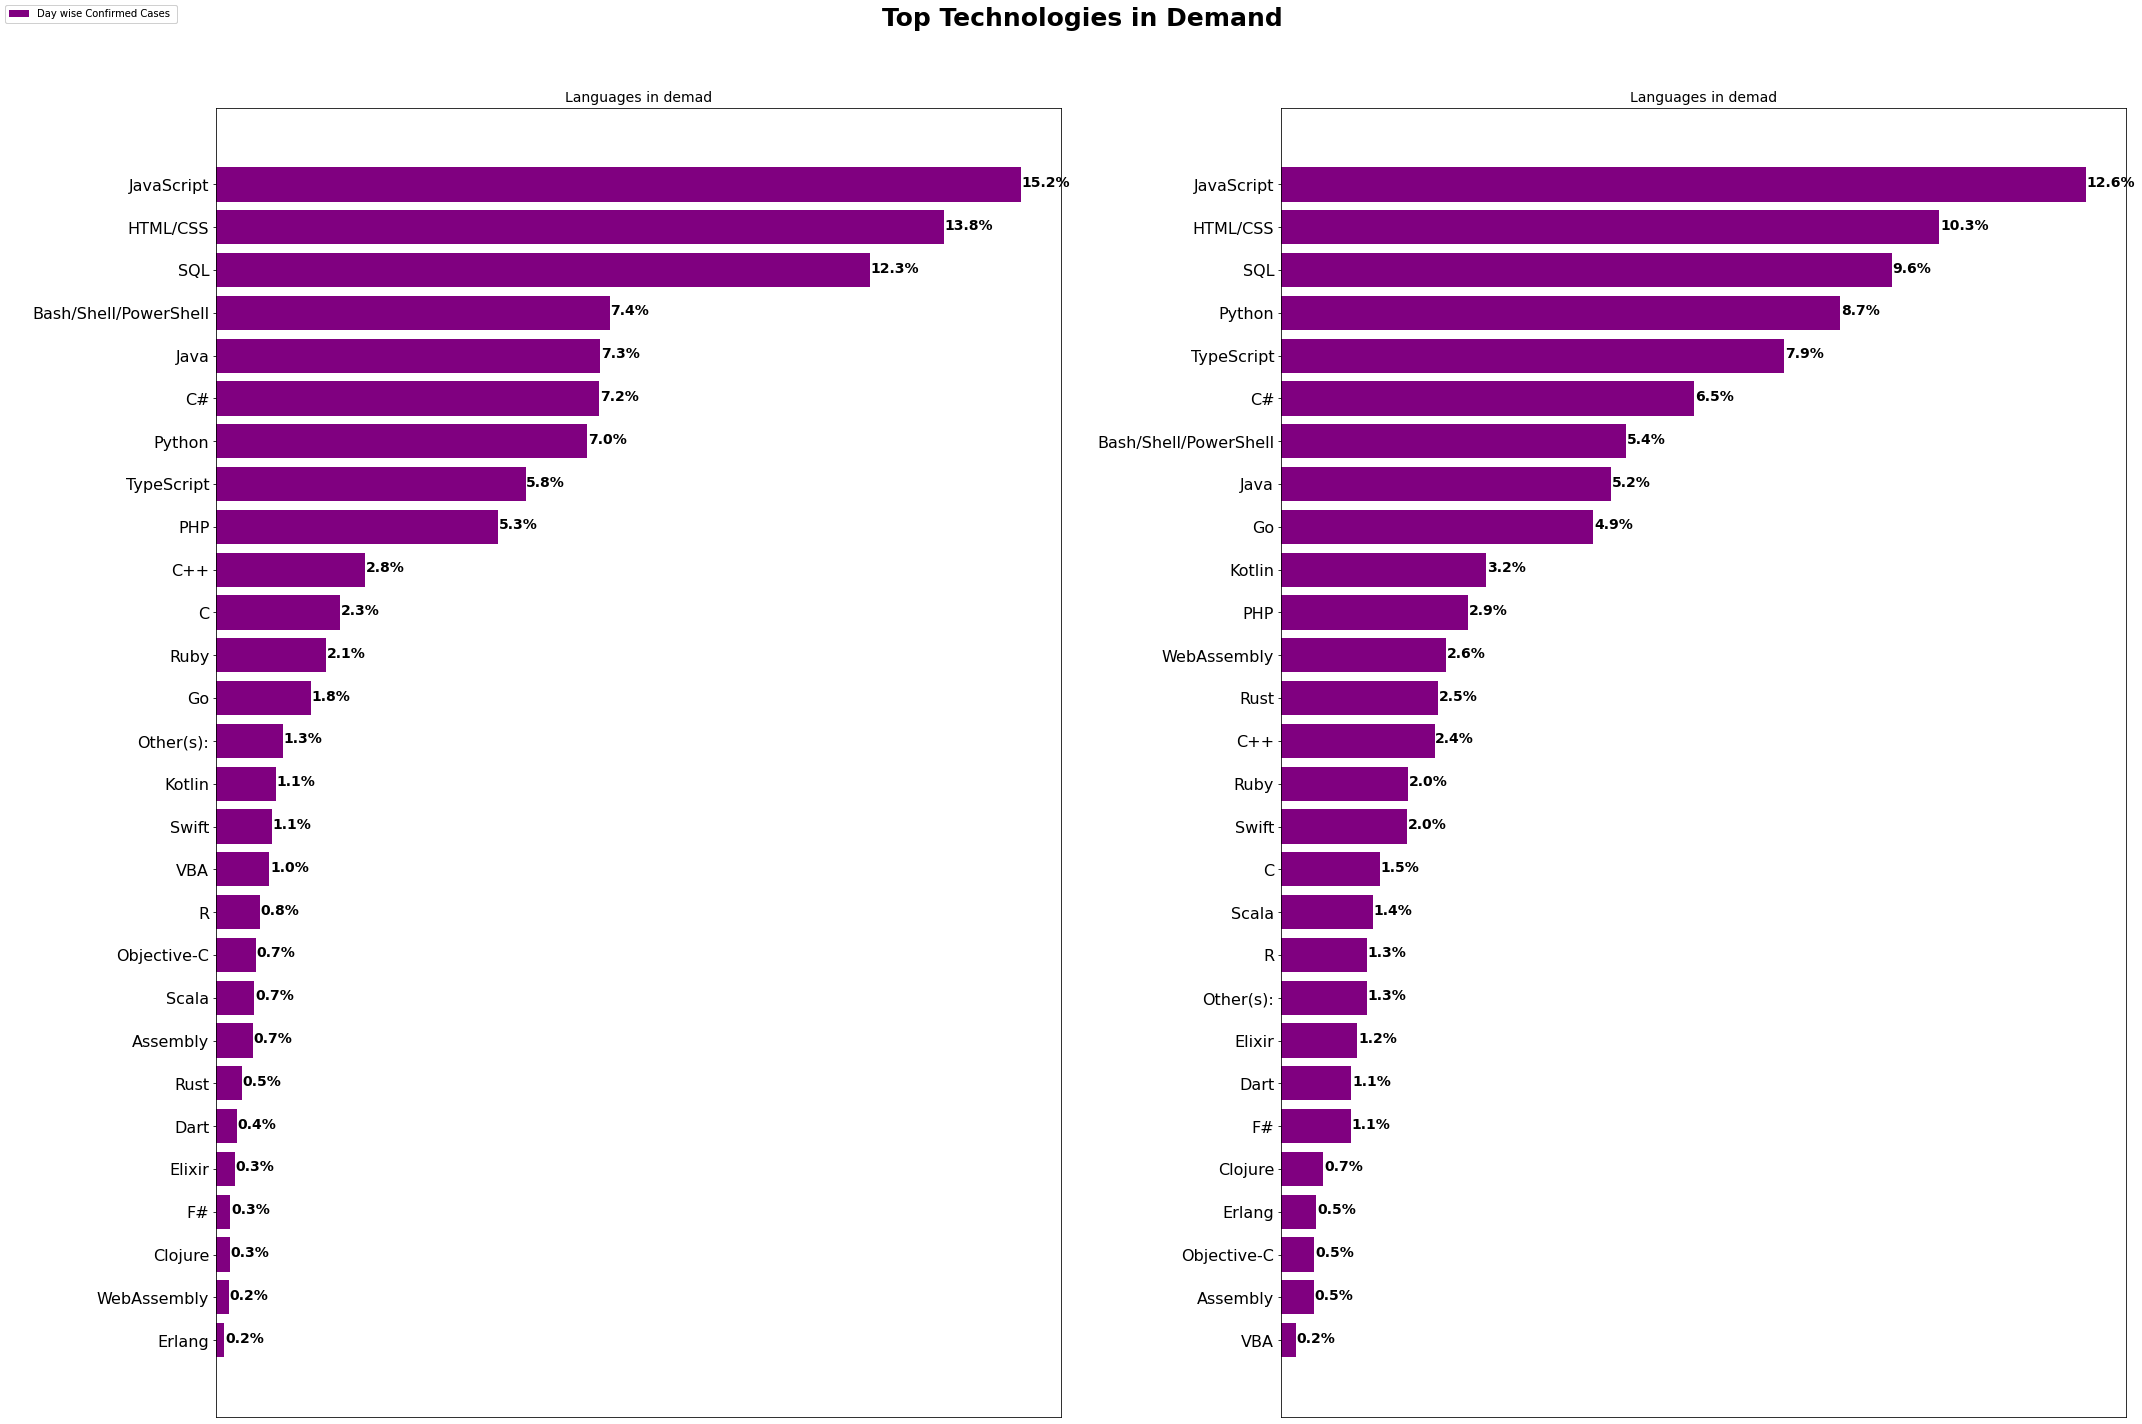

In [137]:
lis = [df_Languages_Worked,df_Languages_Desired]
fig = plt.figure(figsize= (30,20))
plt.suptitle('Top Technologies in Demand',fontsize = 25,y=1.0,weight='bold')
k=1
for data in lis:
    ax = fig.add_subplot(1,2,k)
    ax.barh(data['Languages'],data['Count'],label = 'Day wise Confirmed Cases ',color='purple',orientation  = 'horizontal') 
    ax.set_xlabel('')
    ax.set(xticklabels=[])
    ax.tick_params(bottom=False)
    
    total = sum(data['Count'])
    for i, v in enumerate(data['Count']):
        ax.text(v + 5, i - 0.05 , str(round(v*100/total,1))+'%', fontweight='bold',fontsize = 14)
    plt.tight_layout()
    plt.title('Languages in demad',fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.yticks(fontsize = 16)
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

#### 2. Visualizing Top Databases worked with and desired to work with using bar graph

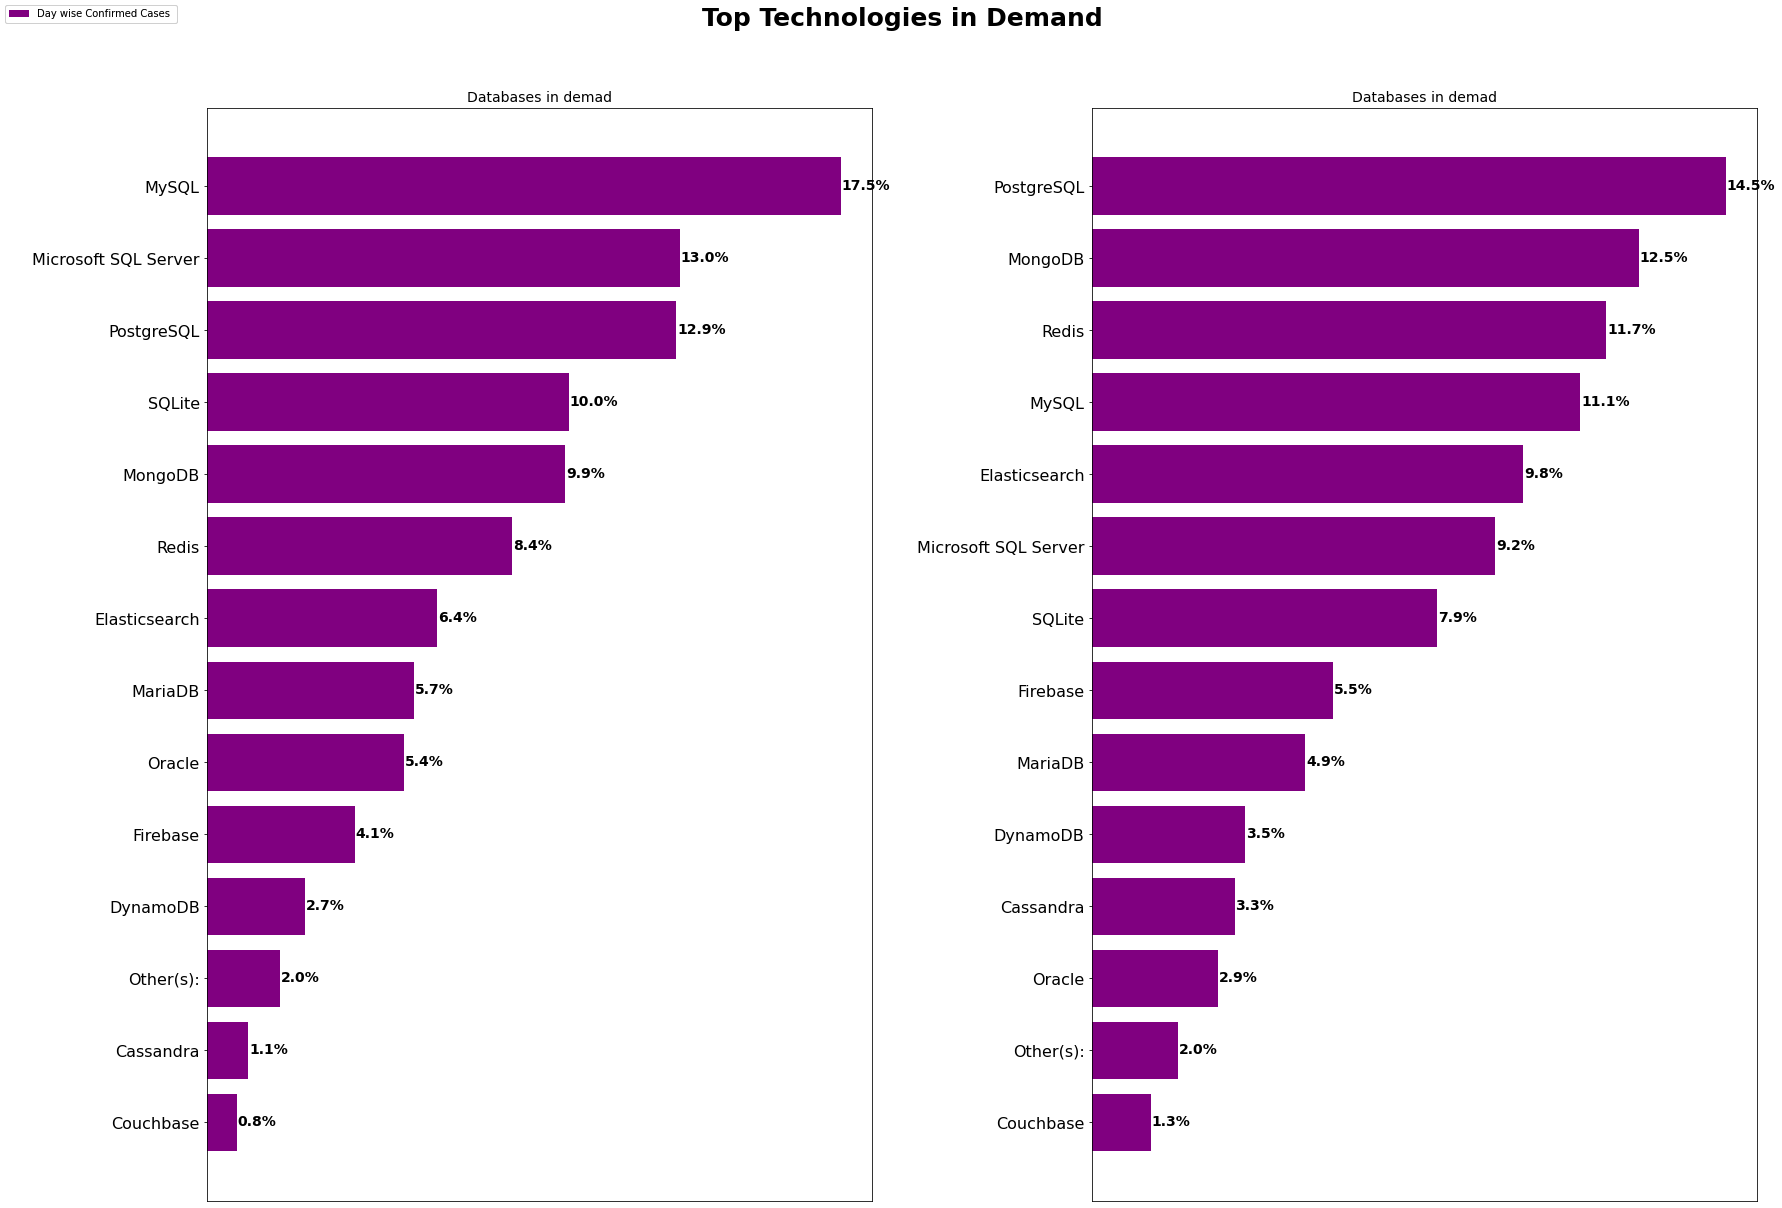

In [136]:
lis = [df_Databases_Worked,df_Databases_Desired]
fig = plt.figure(figsize= (25,17))
plt.suptitle('Top Technologies in Demand',fontsize = 25,y=1.0,weight='bold')
k=1
for data in lis:
    ax = fig.add_subplot(1,2,k)
    ax.barh(data['Databases'],data['Count'],label = 'Day wise Confirmed Cases ',color='purple',orientation  = 'horizontal') 
    ax.set_xlabel('')
    ax.set(xticklabels=[])
    ax.tick_params(bottom=False)
    
    total = sum(data['Count'])
    for i, v in enumerate(data['Count']):
        ax.text(v + 5, i - 0.05 , str(round(v*100/total,1))+'%', fontweight='bold',fontsize = 14)
    plt.tight_layout()
    plt.title('Databases in demad',fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.yticks(fontsize = 16)
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

#### 3. Visualizing Top Platforms worked with and desired to work with using bar graph

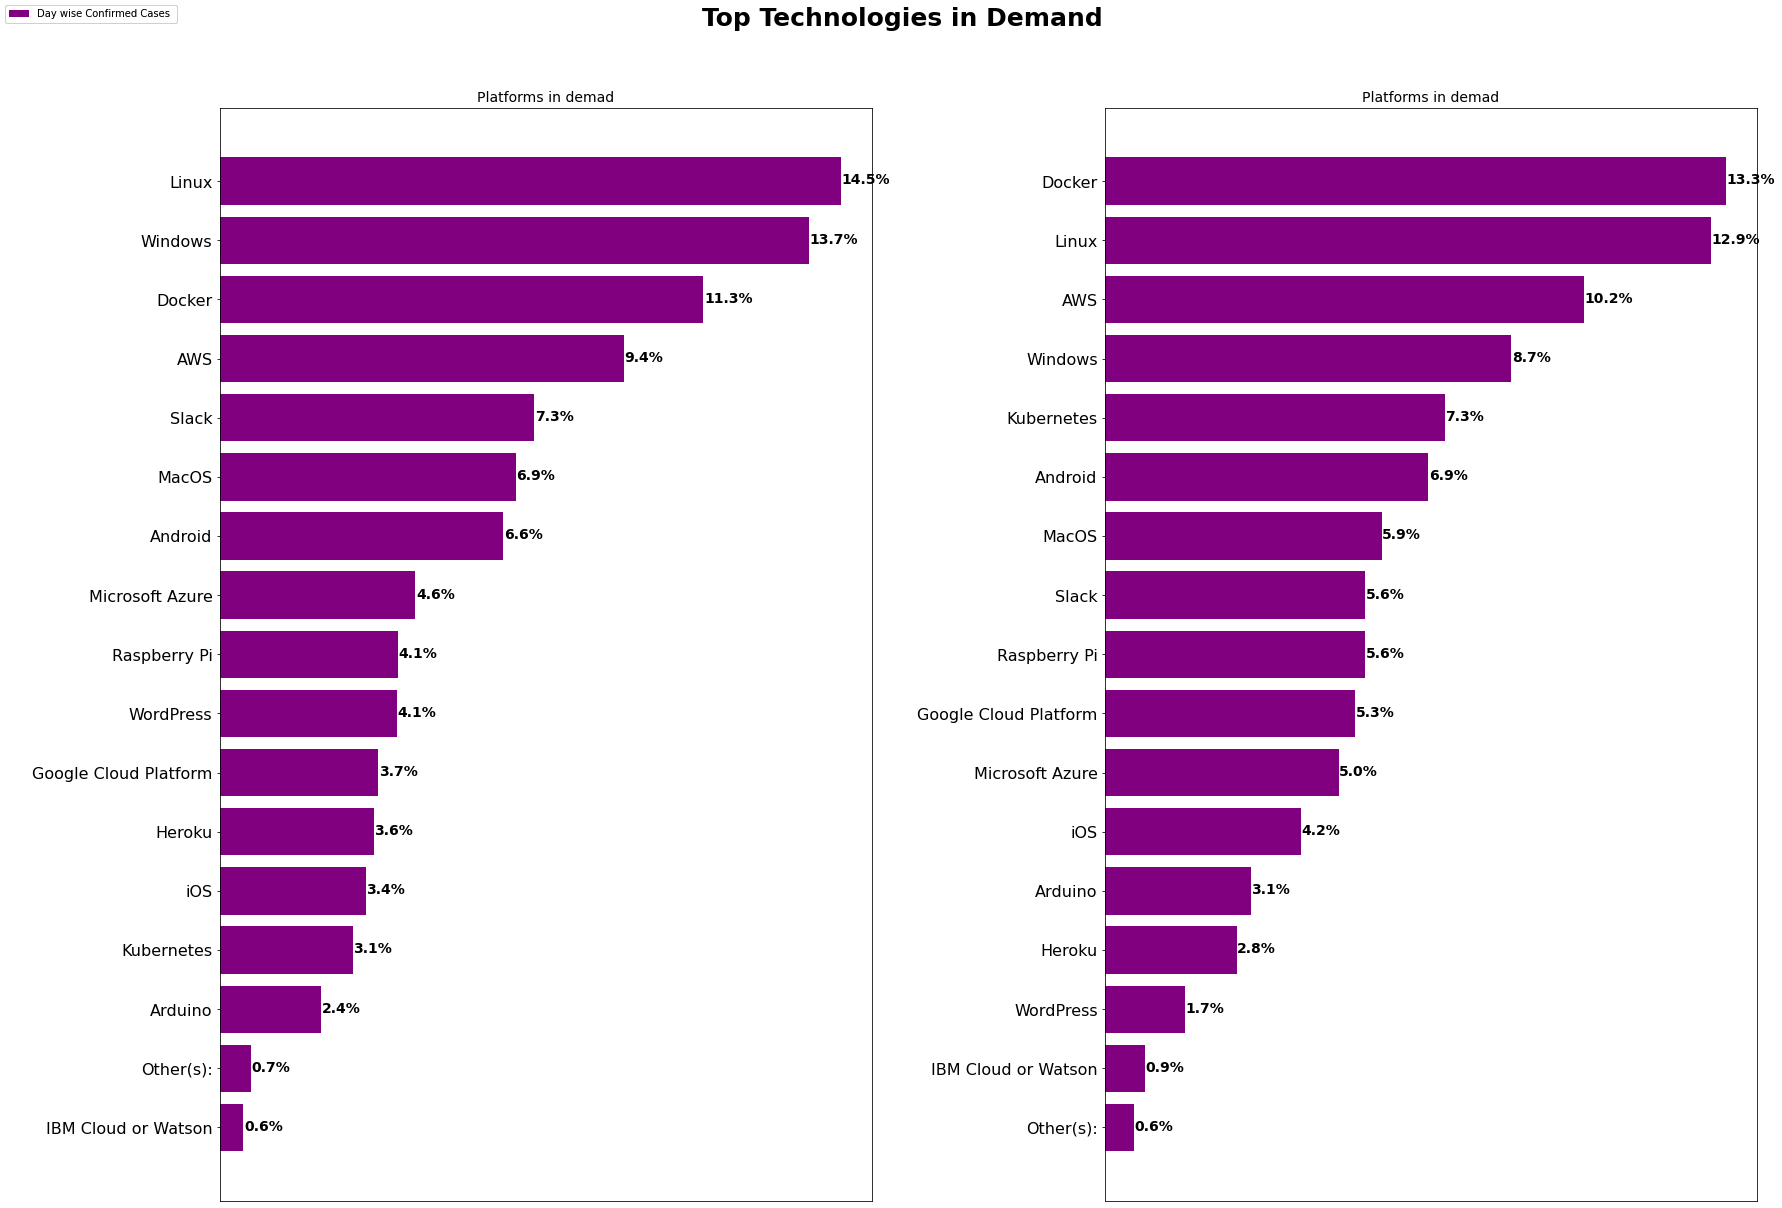

In [135]:
lis = [df_Platforms_Worked,df_Platforms_Desired]
fig = plt.figure(figsize= (25,17))
plt.suptitle('Top Technologies in Demand',fontsize = 25,y=1.0,weight='bold')
k=1
for data in lis:
    ax = fig.add_subplot(1,2,k)
    ax.barh(data['Platforms'],data['Count'],label = 'Day wise Confirmed Cases ',color='purple',orientation  = 'horizontal') 
    ax.set_xlabel('')
    ax.set(xticklabels=[])
    ax.tick_params(bottom=False)

    total = sum(data['Count'])
    for i, v in enumerate(data['Count']):
        ax.text(v + 5, i - 0.05 , str(round(v*100/total,1))+'%', fontweight='bold',fontsize = 14)
    plt.tight_layout()
    plt.title('Platforms in demad',fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.yticks(fontsize = 16)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

#### 4. Visualizing Top WebFrames worked with and desired to work with using bar graph

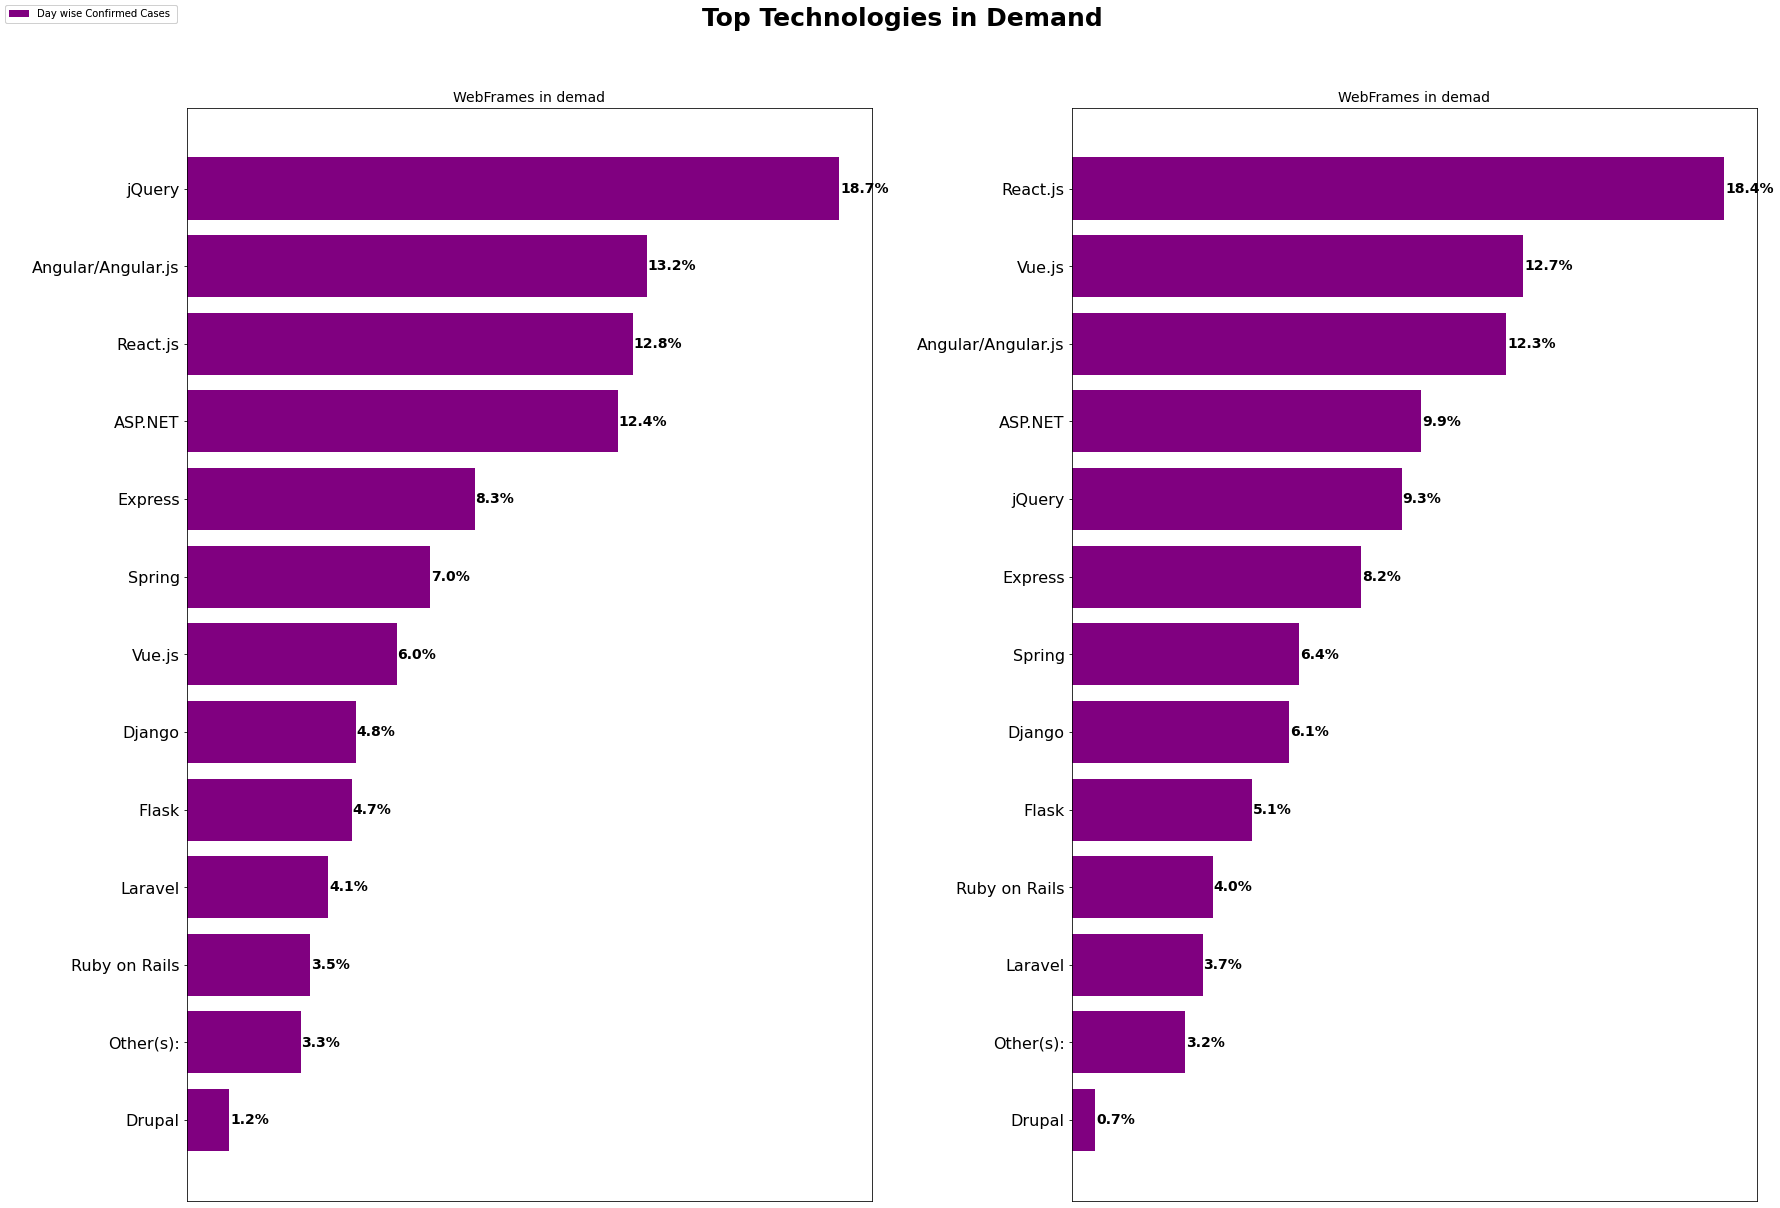

In [134]:
lis = [df_WebFrames_Worked,df_WebFrames_Desired]
fig = plt.figure(figsize= (25,17))
plt.suptitle('Top Technologies in Demand',fontsize = 25,y=1.0,weight='bold')
k=1
for data in lis:
    ax = fig.add_subplot(1,2,k)
    ax.barh(data['WebFrames'],data['Count'],label = 'Day wise Confirmed Cases ',color='purple',orientation  = 'horizontal') 
    plt.title('WebFrames in demad',fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.yticks(fontsize = 16)
    ax.set_xlabel('')
    ax.set(xticklabels=[])
    ax.tick_params(bottom=False)
    
    total = sum(data['Count'])
    for i, v in enumerate(data['Count']):
        ax.text(v + 5, i - 0.05 , str(round(v*100/total,1))+'%', fontweight='bold',fontsize = 14)
    plt.tight_layout()

    plt.title('WebFrames in demad',fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.yticks(fontsize = 16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

#### 5. Visualizing Operating systems used using bar graph

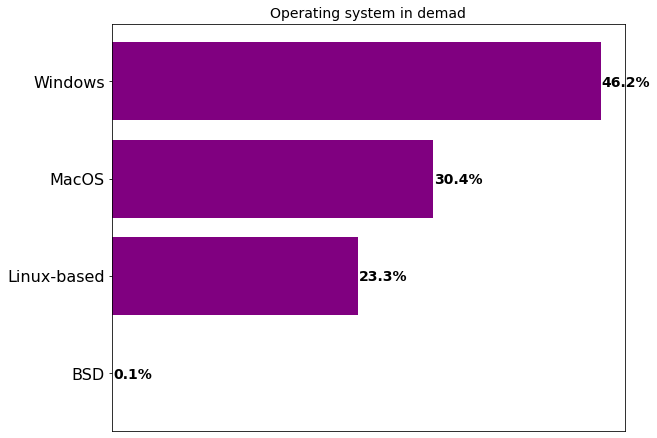

In [168]:
fig, ax = plt.subplots(figsize= (10,7))
ax.barh(df_Operating_Sys['Operating_Sys'],df_Operating_Sys['Count'], label = 'Day wise Confirmed Cases ',color='purple',orientation  = 'horizontal') 
plt.title('WebFrames in demad',fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.yticks(fontsize = 16)
ax.set_xlabel('')
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
    
total = sum(df_Operating_Sys['Count'])
for i, v in enumerate(df_Operating_Sys['Count']):
    ax.text(v + 5, i - 0.05 , str(round(v*100/total,1))+'%', fontweight='bold',fontsize = 14)
plt.tight_layout()

plt.title('Operating system in demad',fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.yticks(fontsize = 16)
#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper left')
#plt.tight_layout(pad=4.0)

**Key Insights**

  * Javascript, HTML/CSS, and SQL are the top three programming languages worked with by IT respondents.
  * MySQL, Postgersql, and Microsoft SQLServer are the top three databases worked with by IT respondents.
  * jQuery, Angular/Angular.js, and Reactjs are the top three Web Frames worked with by IT respondents
  
  * Javascript, Python, and HTML/CSS are the top three programming languages desired to work with by IT respondents.
  * Postgresql, MongoDB, and Reddis are the top three databases desired to work with by IT respondents.
  * Reactjs, Vue.js, and Angular/Angular.js are the top three Web Frames desired to work with by IT respondents.